In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [42]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asrar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [201]:
img = cv2.imread("data/Ajith.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [202]:
def pencil(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_invert = cv2.bitwise_not(img_gray)
    img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
    final = cv2.divide(img_gray, 255 - img_smoothing, scale=255)    
    return(final)
def carton(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_edges = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    img_color = cv2.bilateralFilter(img, 9, 250, 250)
    final = cv2.bitwise_and(img_color, img_color, mask=img_edges)    
    return(final)

ASCII_CHARS = '@%#*+=-:. '

def scale_image(image, new_width=100):
    (original_height, original_width) = image.shape[:2] 
    aspect_ratio = original_height / float(original_width)
    new_height = int(aspect_ratio * new_width / 2)
    new_image = cv2.resize(image, (new_width, new_height))
    return new_image


def map_pixels(image, range_width=25):
    pixels = image.flatten()
    ascii_str = ''
    for pixel_value in pixels:
        index = int(pixel_value / range_width)
        ascii_str += ASCII_CHARS[min(index, len(ASCII_CHARS)-1)]
    return ascii_str


def convert_image_to_ascii(image):
    image = scale_image(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ascii_str = map_pixels(image)
    img_width = image.shape[1]
    ascii_img = ''
    for i in range(0, len(ascii_str), img_width):
        ascii_img += ascii_str[i:i+img_width] + '\n'
    return ascii_img

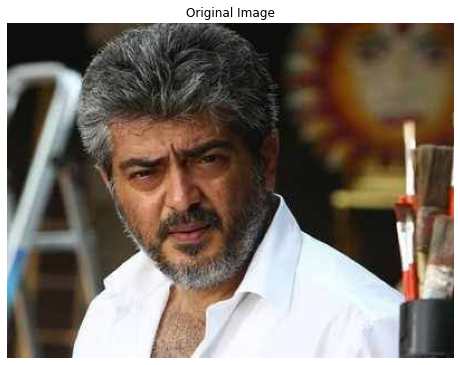

In [203]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

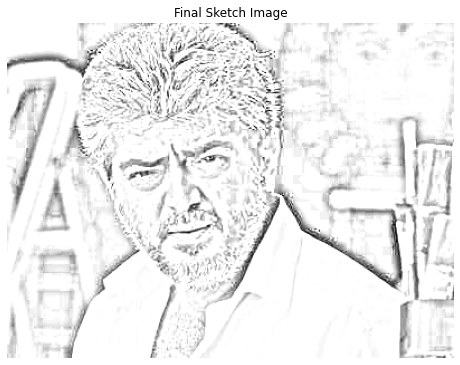

In [204]:
final = pencil(img)

plt.figure(figsize=(8,8))
plt.imshow(final,cmap="gray")
plt.axis("off")
plt.title("Final Sketch Image")
plt.show()

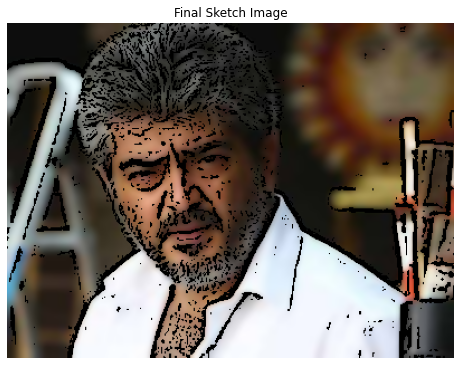

In [205]:
final = carton(img)
plt.figure(figsize=(8,8))
plt.imshow(final,cmap="gray")
plt.axis("off")
plt.title("Final Sketch Image")
plt.show()

In [206]:
ascii_art = convert_image_to_ascii(img)
print(ascii_art)

@@@@@@@@@@@@@@@@@@%%#########**++=+++**#***#%**+#%@@@@@@@@@@@@@@%%###%%%%%%%%%%%%%##**#%%%##*##%%%%%
@@@@@@@@@@@@@@@@@@%%####**=*#*+++=**+#%###%##%#####*@@@@@@@@@@@@%%####%%@@%%%%%%%#############%%%%%%
@@@@@@@@@@@@@@@@@@@%%%*+++++*+++++#####%#@%@%%@##%%%%#%@@@@@@@@%%%%%#%%%@%%%%#%%%%#%##*****###%%%%%%
@@@@@@@@@@@@@@@@@@@%***###***#*+*###@%##%%%%%@@##%%%%%#%%%@@@@%%####%%%@@%%####%%%###********##%%%%%
@@%##**++=+*#@@@@@#+*###%%%%***#*#%#%%@*###@%#%#%%%%%%%@%%@@@@%#***##%%%%%%##***##************######
+=--:::::::::::=%%**+*%*****#%**#*@#*%#%#%#%%%%#%%@%%%%%@@%@@@%%###%%%%%%%%##*******+*************##
---+**#####-.   :*##*####**##+@@%@#@%@%%#++#%%%#%%@%@%@%@@@%@@@%%%%%%%@%%%###****+++++++**********##
=-+#@@@%%%#-:.  -**=++*##%+##%##%%#*###**+%%%#%*%%%%%%%%@@@%@@@%%####%%%%%%###**+++++++***********##
--*@@@@%%%-::. .=*===*#*#%%#%%%%#%*##*#*%%%##**%*##%@%%@%@%#%@%##***##%%%%%%###**++++************###
-+@@@@@%%=:.:..-==--=+##%%%%%%%%%@%#%%%%*%%#%##%%%##@@%%%%@#%@%%%###%%%%@%%%%###**++*******